In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import pickle
import ipywidgets as widgets
from ipywidgets import interactive

import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv('/content/drive/MyDrive/gred/car details v4.csv')


In [4]:
df.head()


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [5]:
df.tail()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0
2058,Mahindra,Bolero Power Plus ZLX [2016-2019],670000,2017,72000,Diesel,Manual,Guwahati,White,First,Individual,1493 cc,70 bhp @ 3600 rpm,195 Nm @ 1400 rpm,RWD,3995.0,1745.0,1880.0,7.0,NaN


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Price,2059.0,1.702992e+06,2.419881e+06,49000.0,484999.00,825000.0,1925000.0,35000000.0
Year,2059.0,2.016425e+03,3.363564e+00,1988.0,2014.00,2017.0,2019.0,2022.0
Kilometer,2059.0,5.422471e+04,5.736172e+04,0.0,29000.00,50000.0,72000.0,2000000.0
Length,1995.0,4.280861e+03,4.424585e+02,3099.0,3985.00,4370.0,4629.0,5569.0
Width,1995.0,1.767992e+03,1.352658e+02,1475.0,1695.00,1770.0,1831.5,2220.0
Height,1995.0,1.591735e+03,1.360740e+02,1165.0,1485.00,1545.0,1675.0,1995.0
Seating Capacity,1995.0,5.306266e+00,8.221701e-01,2.0,5.00,5.0,5.0,8.0
Fuel Tank Capacity,1946.0,5.200221e+01,1.511020e+01,15.0,41.25,50.0,60.0,105.0


In [8]:
df.shape


(2059, 20)

In [9]:
df.columns


Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [11]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [12]:
categorical_columns = df.select_dtypes(exclude=['number']).columns
categorical_columns

Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque',
       'Drivetrain'],
      dtype='object')

In [13]:
df[['Max Power Value', 'Max Power RPM']] = df['Max Power'].str.extract(r'(\d+\.?\d*) bhp @ (\d+ rpm)')

# Extract 'Max Torque Value' and 'Max Torque RPM' from 'Max Torque'
df[['Max Torque Value', 'Max Torque RPM']] = df['Max Torque'].str.extract(r'(\d+\.?\d*) Nm @ (\d+ rpm)')
# Clean 'Max Torque' column by extracting numeric values
df['Max Torque'] = df['Max Torque'].str.extract('(\d+)', expand=False).astype(float)

# Convert extracted values to numeric
df['Max Power Value'] = pd.to_numeric(df['Max Power Value'])
df['Max Torque Value'] = pd.to_numeric(df['Max Torque Value'])

# Extract numeric engine size from the 'Engine' column
df['Engine Size'] = df['Engine'].str.extract('(\d+)', expand=False).astype(float)
# Convert 'Engine Size' to numeric for analysis
df['Engine Size'] = pd.to_numeric(df['Engine Size'])

In [14]:
df = df.drop(columns=['Engine', 'Max Power', 'Max Torque'])

In [15]:
df.isnull().sum()


,0
Make,0
Model,0
Price,0
Year,0
Kilometer,0
Fuel Type,0
Transmission,0
Location,0
Color,0
Owner,0


In [16]:
numeric_columns = ['Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Max Power Value', 'Max Torque Value', 'Engine Size']
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [17]:
categorical_columns = ['Drivetrain', 'Max Power RPM', 'Max Torque RPM']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [18]:
if df['Drivetrain'].isnull().sum() / len(df) > 0.3:  # Threshold > 30% missing values
    df.drop(columns=['Drivetrain'], inplace=True)

In [19]:
df.isnull().sum()


,0
Make,0
Model,0
Price,0
Year,0
Kilometer,0
Fuel Type,0
Transmission,0
Location,0
Color,0
Owner,0


In [20]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power Value,Max Power RPM,Max Torque Value,Max Torque RPM,Engine Size
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000 rpm,109.0000,4500 rpm,1198.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000 rpm,190.0000,2000 rpm,1248.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000 rpm,112.7619,4000 rpm,1197.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000 rpm,113.0000,4200 rpm,1197.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400 rpm,343.0000,1400 rpm,2393.0


In [21]:
label_encoder = LabelEncoder()

for column in ['Owner', 'Transmission', 'Fuel Type', 'Color', 'Seller Type']:
    df[column] = label_encoder.fit_transform(df[column])


In [22]:
# Perform statistical analysis for each numeric column
for column in numeric_columns:
    # Measures of Central Tendency
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]

    # Measures of Spread
    std_dev = df[column].std()
    variance = df[column].var()
    data_range = df[column].max() - df[column].min()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Distribution Analysis
    skewness_value = skew(df[column], nan_policy='omit')
    kurtosis_value = kurtosis(df[column], nan_policy='omit')

    # Display the results
    print(f"\nColumn: {column}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Variance: {variance}")
    print(f"Range: {data_range}")
    print(f"Interquartile Range (IQR): {iqr}")
    print(f"Skewness: {skewness_value}")
    print(f"Kurtosis: {kurtosis_value}")

    # Check for Normality (Optional): Test if data follows normal distribution using skewness and kurtosis
    if abs(skewness_value) < 1 and abs(kurtosis_value) < 3:
        print(f"Distribution of {column} appears to be approximately normal.")
    else:
        print(f"Distribution of {column} is not normal.")


Column: Length
Mean: 4283.631374453618
Median: 4370.0
Mode: 3995.0
Standard Deviation: 435.79912702109493
Variance: 189920.87911234843
Range: 2470.0
Interquartile Range (IQR): 634.0
Skewness: -0.0406194810165102
Kurtosis: -0.7563391021560917
Distribution of Length appears to be approximately normal.

Column: Width
Mean: 1768.0543953375425
Median: 1770.0
Mode: 1695.0
Standard Deviation: 133.14641156776764
Variance: 17727.96691337337
Range: 745.0
Interquartile Range (IQR): 136.0
Skewness: 0.3115962832745579
Kurtosis: 1.0165629940236762
Distribution of Width appears to be approximately normal.

Column: Height
Mean: 1590.2826614861583
Median: 1545.0
Mode: 1475.0
Standard Deviation: 134.1868747030534
Variance: 18006.11734257295
Range: 830.0
Interquartile Range (IQR): 187.0
Skewness: 0.8769856945023606
Kurtosis: 0.1437971407938079
Distribution of Height appears to be approximately normal.

Column: Seating Capacity
Mean: 5.296745993200583
Median: 5.0
Mode: 5.0
Standard Deviation: 0.811029471

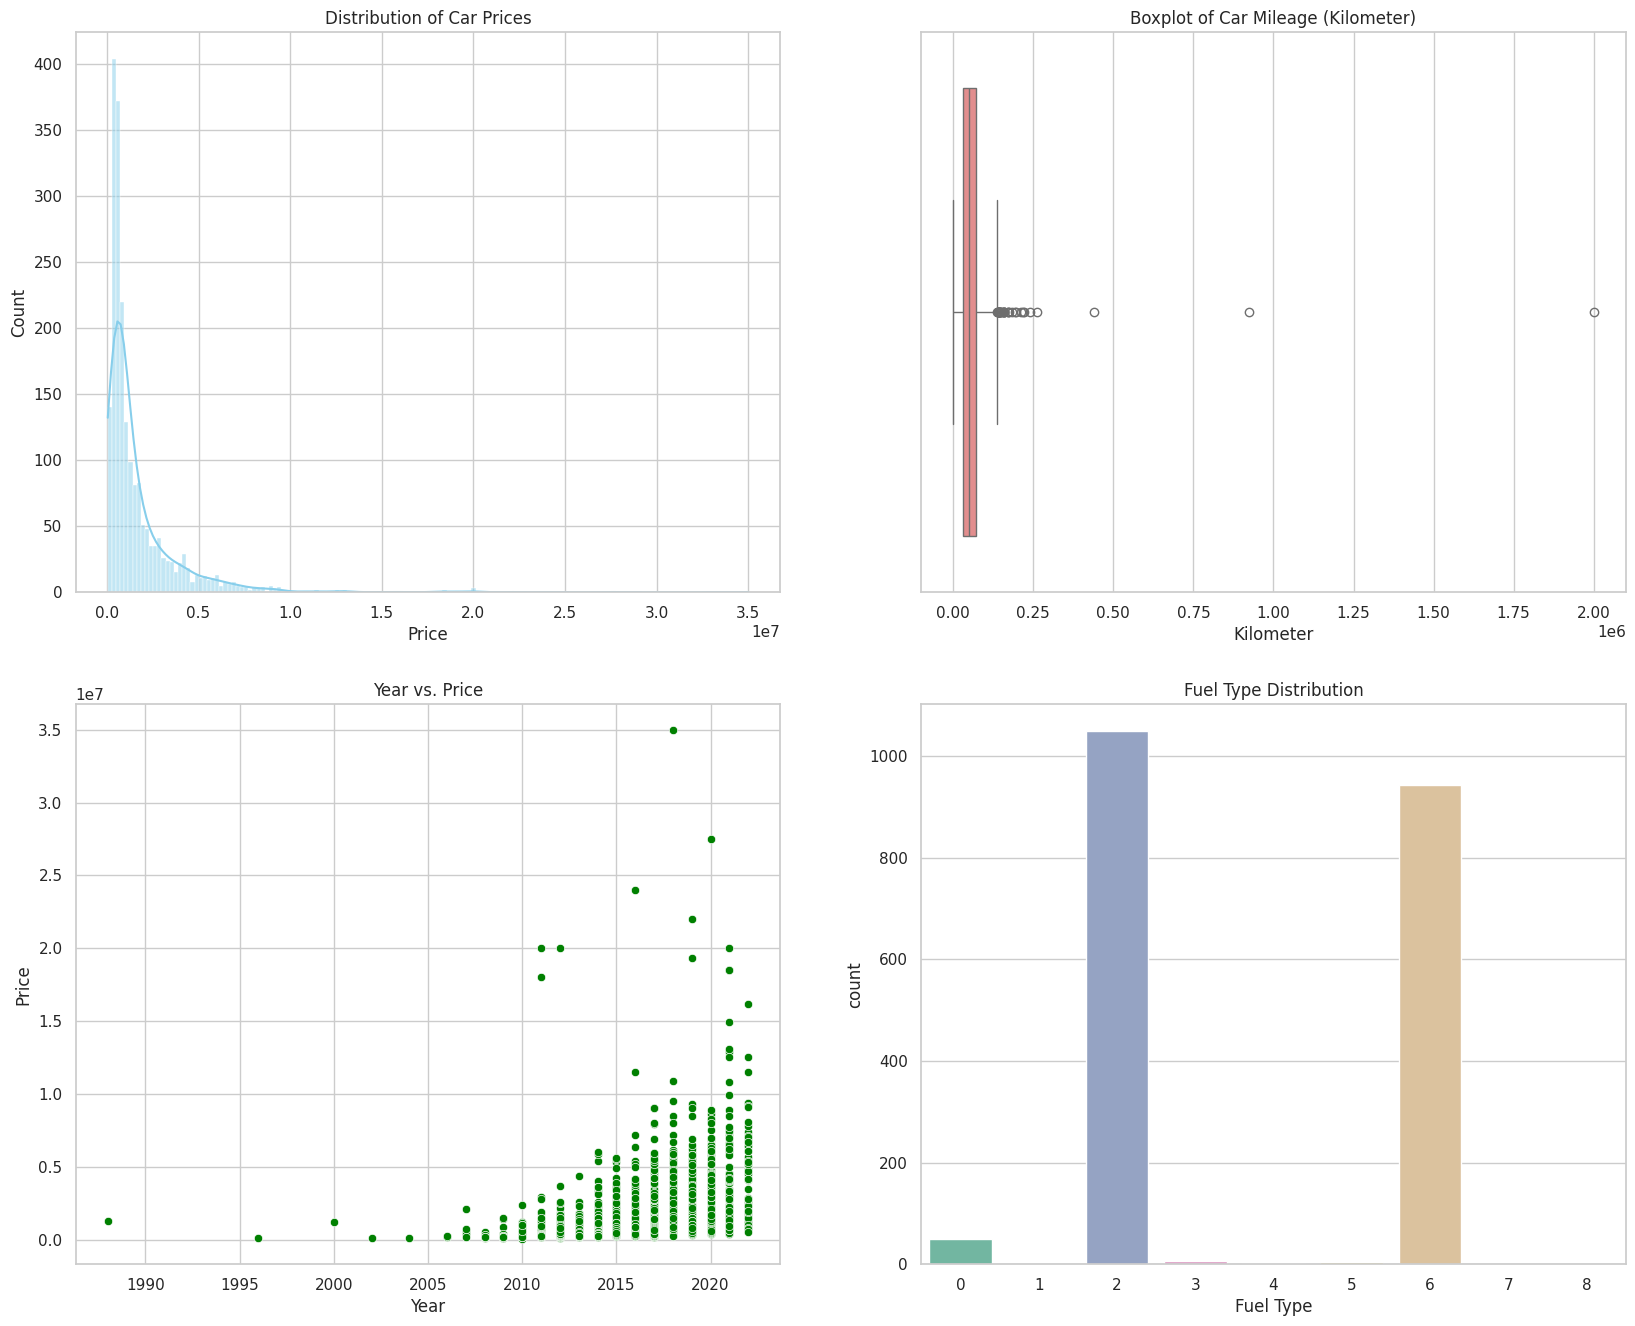

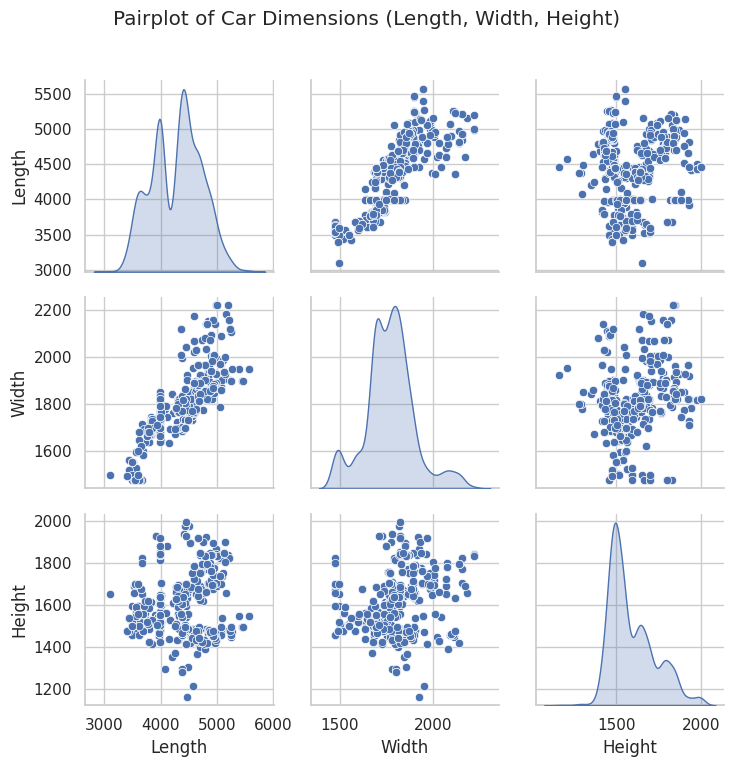

In [23]:
sns.set(style="whitegrid")

# Create subplots for various visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot 1: Histogram for 'Price'
sns.histplot(df['Price'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Car Prices')

# Plot 2: Boxplot for 'Kilometer'
sns.boxplot(x=df['Kilometer'], color='lightcoral', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Car Mileage (Kilometer)')

# Plot 3: Scatter plot for 'Year' vs. 'Price'
sns.scatterplot(x=df['Year'], y=df['Price'], color='green', ax=axes[1, 0])
axes[1, 0].set_title('Year vs. Price')

# Plot 4: Bar chart for 'Fuel Type'
sns.countplot(x=df['Fuel Type'], palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Fuel Type Distribution')

# Plot 5: Pairplot for 'Length', 'Width', 'Height'
sns.pairplot(df[['Length', 'Width', 'Height']], diag_kind='kde', markers='o')
plt.suptitle('Pairplot of Car Dimensions (Length, Width, Height)', y=1.02)

# Show the plots
plt.tight_layout()
plt.show()

In [24]:
df_encoded = df.copy()

# Encode all categorical columns
categorical_columns = df_encoded.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoders for potential inverse transformation

# Compute correlation matrix
correlation_matrix_all = df_encoded.corr()

# Extract correlations with 'Price'
correlations_with_price_all = correlation_matrix_all['Price'].sort_values(ascending=False)
correlations_with_price_all

,Price
Price,1.000000
Max Power Value,0.780720
Max Torque Value,0.671969
Engine Size,0.611275
Fuel Tank Capacity,0.560842
Width,0.559786
Length,0.551212
Year,0.311400
Height,0.076279
Owner,0.029360


<Axes: >

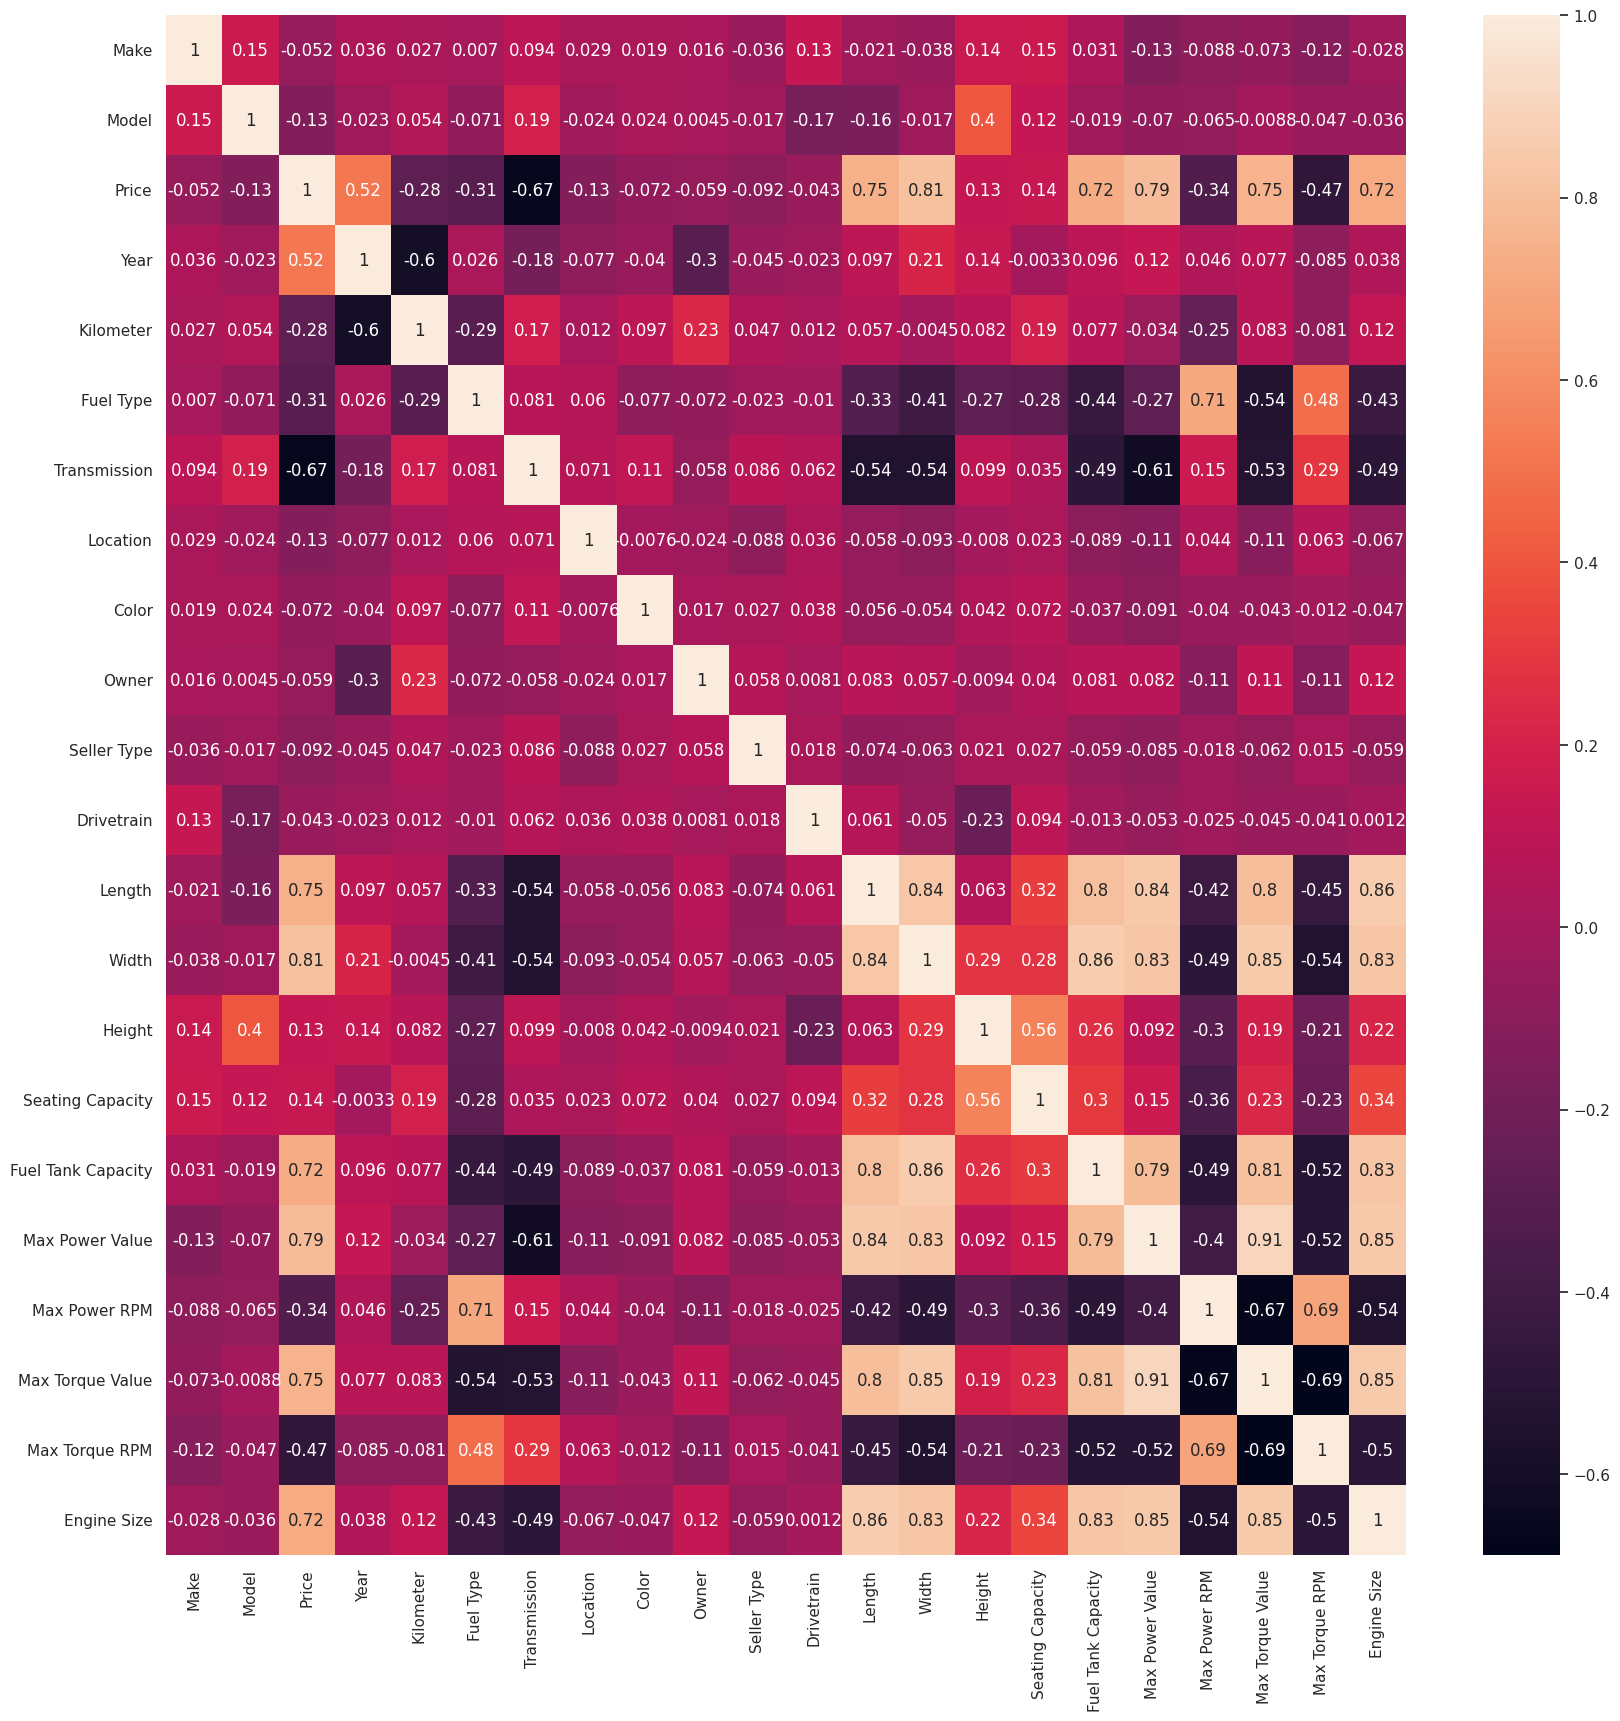

In [25]:
c=df_encoded.corr(method='spearman')
plt.figure(figsize=(20,20))
sns.heatmap(c,annot=True)

In [26]:
features = ['Max Power Value', 'Max Torque Value', 'Fuel Tank Capacity',
           'Width', 'Length', 'Year', 'Engine Size']
target = 'Price'

In [27]:
X = df[features]
y = df[target]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test_scaled)

In [32]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2011179861625.324
R^2 Score: 0.7121244451382216


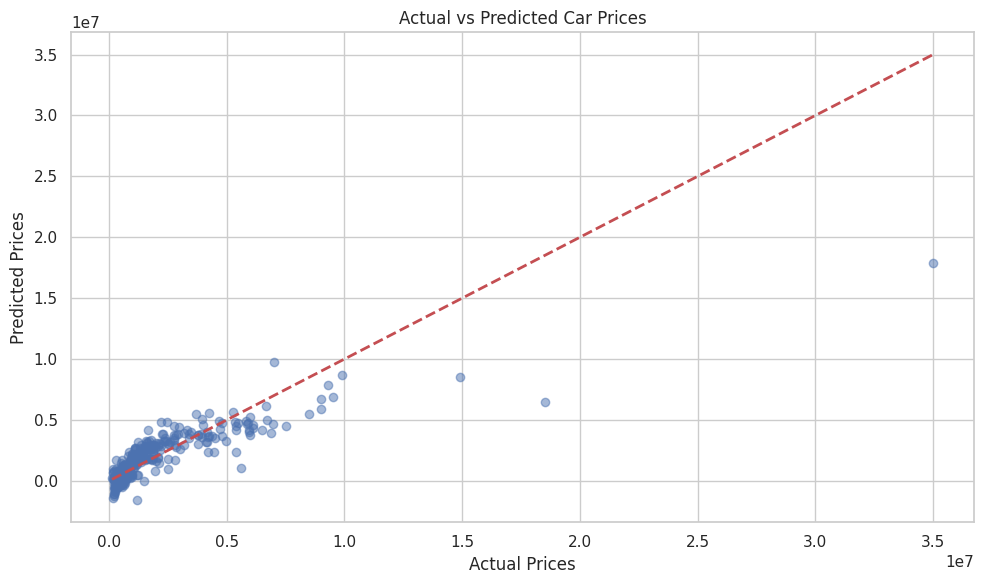

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.tight_layout()
plt.show()

In [34]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Apply cross-validation with R² scoring
cv_r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
cv_mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')  # Negative MSE for consistency

# Print results
print("Cross-Validation Results:")
print(f"Mean R²: {cv_r2_scores.mean():.4f} ± {cv_r2_scores.std():.4f}")
print(f"Mean MSE: {cv_mse_scores.mean():.2f} ± {cv_mse_scores.std():.2f}")

Cross-Validation Results:
Mean R²: 0.6640 ± 0.1054
Mean MSE: 1994508503994.90 ± 1008026178687.54


In [35]:
model.fit(X, y)
y_pred = model.predict(X)

# Evaluate the model on the entire dataset
final_mse = mean_squared_error(y, y_pred)
final_r2 = r2_score(y, y_pred)

print("\nModel Performance on CV:")
print(f"Final Mean Squared Error: {final_mse:.2f}")
print(f"Final R² Score: {final_r2:.4f}")


Model Performance on CV:
Final Mean Squared Error: 1897193288966.16
Final R² Score: 0.6759


In [36]:
rf_model = RandomForestRegressor(random_state=42)
rf_r2_scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='r2')

print("\nModel (Random Forest):")
print(f"Mean R²: {rf_r2_scores.mean():.4f} ± {rf_r2_scores.std():.4f}")


Model (Random Forest):
Mean R²: 0.8796 ± 0.0468


In [37]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [38]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [39]:
def evaluate_model(model, X, y, kfold):
    cv_r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    cv_mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')  # Negative MSE
    return cv_r2_scores, cv_mse_scores

In [40]:
results = {}
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} with Polynomial Features...")
    r2_scores, mse_scores = evaluate_model(model, X_poly, y, kfold)
    results[model_name] = {
        "Mean R²": r2_scores.mean(),
        "R² Std": r2_scores.std(),
        "Mean MSE": mse_scores.mean(),
        "MSE Std": mse_scores.std()
    }
    print(f"{model_name} Mean R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
    print(f"{model_name} Mean MSE: {mse_scores.mean():.2f} ± {mse_scores.std():.2f}")


Evaluating Linear Regression with Polynomial Features...
Linear Regression Mean R²: 0.7863 ± 0.0638
Linear Regression Mean MSE: 1228869876043.19 ± 536733297004.91

Evaluating Random Forest with Polynomial Features...
Random Forest Mean R²: 0.8555 ± 0.0625
Random Forest Mean MSE: 903911923752.91 ± 621860218864.82

Evaluating Gradient Boosting with Polynomial Features...
Gradient Boosting Mean R²: 0.8655 ± 0.0575
Gradient Boosting Mean MSE: 842036953823.86 ± 569892231672.32


In [41]:
final_results = {}
for model_name, model in models.items():
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    final_mse = mean_squared_error(y, y_pred)
    final_r2 = r2_score(y, y_pred)
    final_results[model_name] = {
        "Final R²": final_r2,
        "Final MSE": final_mse
    }

In [42]:
print("\nFinal Model Performance (on Full Data):")
for model_name, result in final_results.items():
    print(f"{model_name} - Final R²: {result['Final R²']:.4f}, Final MSE: {result['Final MSE']:.2f}")


Final Model Performance (on Full Data):
Linear Regression - Final R²: 0.8368, Final MSE: 955339606527.44
Random Forest - Final R²: 0.9733, Final MSE: 156505624749.72
Gradient Boosting - Final R²: 0.9667, Final MSE: 195160875087.17
